# Rachel Ward - AIM 5010 - M5 Practical Challenge

## Introduction

For this practical challenge I will be cleaning and preparing two different datasets, and building 8 different machine learning models. This practical challenge consists of three parts, namely:

**Part A - Numerical Prediction** where I will construct the following models:
- Linear regression
- Gradient boost like xgboost
- Decision tree
- SVM

**Part B - Yes/No Prediction** where I will construct the following models:
- Binary Logistic Regression
- Multinomial Logistic Regression
- Ordinal Logistic Regression

**Part C - Clustering** where I will construct the following model:
- Cluster Model

## Part A

For Part A I will be using a dataset from [kaggle.com](https://www.kaggle.com/gregorut/videogamesales) regarding video game sales. First I will clean and prepare the data, including checking for missing values, performing exploratory data analysis, and splitting the data into training and testing sets. I will then create four different machine learning models and compare their performance.

### Part A - Data Dictionary
The dataset consists of 11 variables related to video game sales for games which had over 100,000 sold. The fields are:

- **Rank** - Ranking of overall sales
- **Name** - The name of the game
- **Platform** - Platform of the games release (i.e. PC,PS4, etc.)
- **Year** - Year of the game's release
- **Genre** - Genre of the game
- **Publisher** - Publisher of the game
- **NA_Sales** - Sales in North America (in millions)
- **EU_Sales** - Sales in Europe (in millions)
- **JP_Sales** - Sales in Japan (in millions)
- **Other_Sales** - Sales in the rest of the world (in millions)
- **Global_Sales** - Total worldwide sales

### Part A - Data Preparation
I will now begin my exploratory data analysis by reading in the file and performing exploratory data analysis.

In [1]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#next read in the file
filename = 'https://raw.githubusercontent.com/rachelward617/AIM-5010/master/vgsales.csv'
games = pd.read_csv(filename)

#check results
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
#check data types and for null values
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
#check for duplicates
games[games.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


I see from above that there are about 250 missing values in the Year column and about 58 missing values in the Publisher column. There are no duplicate rows.

I will take a look at the rows with missing data to see if there are any patterns I can use to impute the missing data. 

In [4]:
#check out the null rows
check1 = games[games.isnull().any(axis=1)]
check1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


From domain knowledge, I know that most Sports games (such as Madden NFL or FIFA Soccer) are released the year prior to the year contained in their title. So, for example Maddel NFL 2004 was released in 2003. I will now isolate those rows since I can fill in the actual missing values. 

In [5]:
check2 = check1[(check1.Genre == 'Sports')]
check2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
2484,2486,Madden NFL 07,PSP,NaN,Sports,Unknown,0.77,0.03,0.00,0.04,0.83
2497,2499,MLB SlugFest 20-03,PS2,NaN,Sports,Unknown,0.41,0.32,0.00,0.11,0.83
2528,2530,Shaun White Snowboarding,X360,NaN,Sports,Ubisoft,0.48,0.26,0.00,0.08,0.82
2586,2588,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,Konami Digital Entertainment,0.04,0.33,0.26,0.17,0.80
2776,2778,Madden NFL 11,Wii,NaN,Sports,Unknown,0.70,0.00,0.00,0.05,0.74
3421,3423,Madden NFL 06,X360,NaN,Sports,Electronic Arts,0.54,0.00,0.01,0.03,0.59
3501,3503,Madden NFL 2002,XB,NaN,Sports,Unknown,0.53,0.02,0.00,0.03,0.58


In [6]:
#use the Rank as the keys
keys = check2['Rank'].to_list()
#use domain knowledge and internet searches to create the values
values = [2003,2003,1998,2005,2002,2008,2008,2010,2005,2001,2003,1980,2006,2010,2002,2002,2004,2002,1997,2005,2006,2010,
         2011, 1997,2009,2002,2002,2004,2001,2002,2005,2006,2010,2007,2003,2003,2007,2018,2006,2006,2008,2008]

# use zip() to convert lists to dictionary 
newyears = dict(zip(keys, values)) 

#check results
len(newyears)

42

In [7]:
#copy dataframe
games2 = games.copy()

#use the dictionary to fill in null values
games2.Year = games2.Year.fillna(games2.Rank.map(newyears))

#check for nulls
games2.isna().sum()

Rank              0
Name              0
Platform          0
Year            229
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Now I will look for rows that have the 2600 Platform since I know that the platform came out in the early '80s, and I will use a random year between 1982 and 1992 for these games.

In [8]:
#get rows with missing values and platform of 2600
check3 = check1[(check1.Platform == '2600')]

#check results
check3

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
1513,1515,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.0,0.01,1.30
1585,1587,Combat,2600,NaN,Action,Atari,1.17,0.07,0.0,0.01,1.25
2113,2115,Air-Sea Battle,2600,NaN,Shooter,Atari,0.91,0.06,0.0,0.01,0.98
3880,3882,Fishing Derby,2600,NaN,Sports,Activision,0.48,0.03,0.0,0.01,0.51
4151,4153,Karate,2600,NaN,Fighting,Ultravision,0.44,0.03,0.0,0.00,0.47
4232,4234,Circus Atari,2600,NaN,Action,Atari,0.43,0.03,0.0,0.00,0.46
4378,4380,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,Atari,0.42,0.02,0.0,0.00,0.45
4469,4471,Super Breakout,2600,NaN,Puzzle,Atari,0.41,0.03,0.0,0.00,0.44
5061,5063,Hangman,2600,NaN,Puzzle,Atari,0.35,0.02,0.0,0.00,0.38


In [9]:
#get list of ranks as keys
keys2 = check3['Rank'].to_list()

import random

#create a random year between 1982 and 1992 for the games with a 2600 system
length = len(keys2)
values2 = [random.randint(1981, 1993) for x in range(1, length)]

# use zip() to convert lists to dictionary 
newyears2 = dict(zip(keys2, values2))   

#copy dataframe
games3 = games2.copy()

#use the dictionary to fill in null values
games3.Year = games3.Year.fillna(games3.Rank.map(newyears2))

#check for nulls
games3.isna().sum()

Rank              0
Name              0
Platform          0
Year            214
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Since there is already a category of "unknown" for Publisher, I will fill the missing Publisher values with "Unknown."

In [10]:
#fill null publisher values with unknown
games3.Publisher = games3.Publisher.fillna("Unknown")

#check number of nulls
games3.isna().sum()

Rank              0
Name              0
Platform          0
Year            214
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

At this point I have utilized as much domain knowledge I have to fill in the missing Year values, and since the remaining rows with missing values are roughly 1% of the entire dataset, I feel that it is valid to remove these rows from my analysis. 

In [11]:
#drop nulls
games3 = games3.dropna()

games3.reset_index(drop=True)

#check results
games3.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
#transform the year into an integer instead of a float from earlier
games3 = games3.astype({"Year": int})

#check data types again
games3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16384 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16384 non-null int64
Name            16384 non-null object
Platform        16384 non-null object
Year            16384 non-null int32
Genre           16384 non-null object
Publisher       16384 non-null object
NA_Sales        16384 non-null float64
EU_Sales        16384 non-null float64
JP_Sales        16384 non-null float64
Other_Sales     16384 non-null float64
Global_Sales    16384 non-null float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


### Part A - Exploratory Data Analysis

Now that I have prepared the data to impute missing values, I will perform an exploratory data analysis.

In [13]:
#get summary statistics for each numeric variable, including mean, standard deviation, median, quartiles, and range
games3.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000,16384.000000
mean,8287.262390,2006.385315,0.265862,0.147412,0.078425,0.048303,0.540277
std,4791.775762,5.851102,0.821087,0.508232,0.311050,0.189675,1.563828
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4134.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8282.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12435.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


From the summary statistics I see that the average year for video games included in this dataset was 2006, with a minimum of 1980 and a maximum of 2020. The average North American sales (in millions) was .08, with a min of .00 and a max of 41.49. This is quite a large range. The average European Sales (in millions) was .02, with a min of .00 and a max of 29.02. The average Japanese sales was 0.01 with a min of .00 and a max of 10.57. The average global sales was .17 with a min of .01 and a max of 82.7. The larger North American Sales figures are not surprising since the North American market is much larger than both the European market and the Japanese market. 

Now I will create lists of the categorical and numerical variables so that I can create a few visualizations to look at the distributions of my data. I will exclude both the Rank and Name variables since they are distinct and there are over 16,000 possible values, which would render any visualizations created using these unusable.

In [14]:
#create lists of numerical and categorical attributes
#exclude rank since any visualization will not share any new information as it is a discrete variable from 1 to ~16000
#also exclude Name since each game will have its own name
col_cat=['Platform', 'Year', 'Genre', 'Publisher']

col_num=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

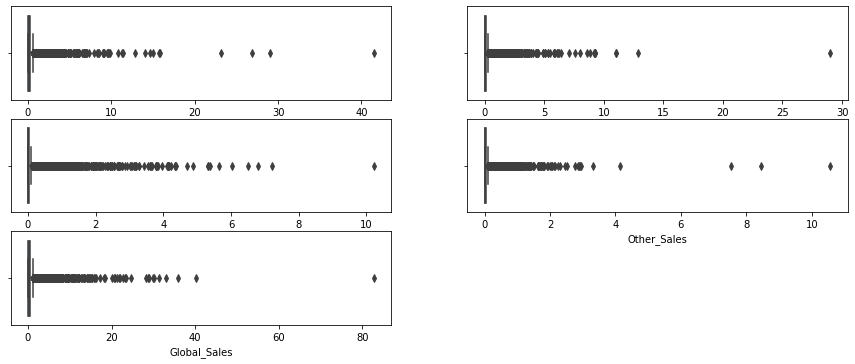

In [15]:
#define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(15,10))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1

for k in col_num :   #for each numeric variable graph a boxplot 
    plt.subplot(5,2,j) 
    sns.boxplot(x=k, data=games3);
    j=j+1

#show results    
plt.show()

It appears that there are many outliers, which could skew the results even though we will be standardizing the data. Since Wii Sports (Rank 1) is a very large outlier, with more than twice as many total sales as any other game, I think it would be fair to exclude this point from the analysis, while leaving the rest. Although this may still skew the results, the effects will not be as large.

In [16]:
#drop games_final
games_final = games3.drop([games3.index[0]]) 

games_final = games_final.reset_index(drop=True)

#check results
games_final.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
4,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


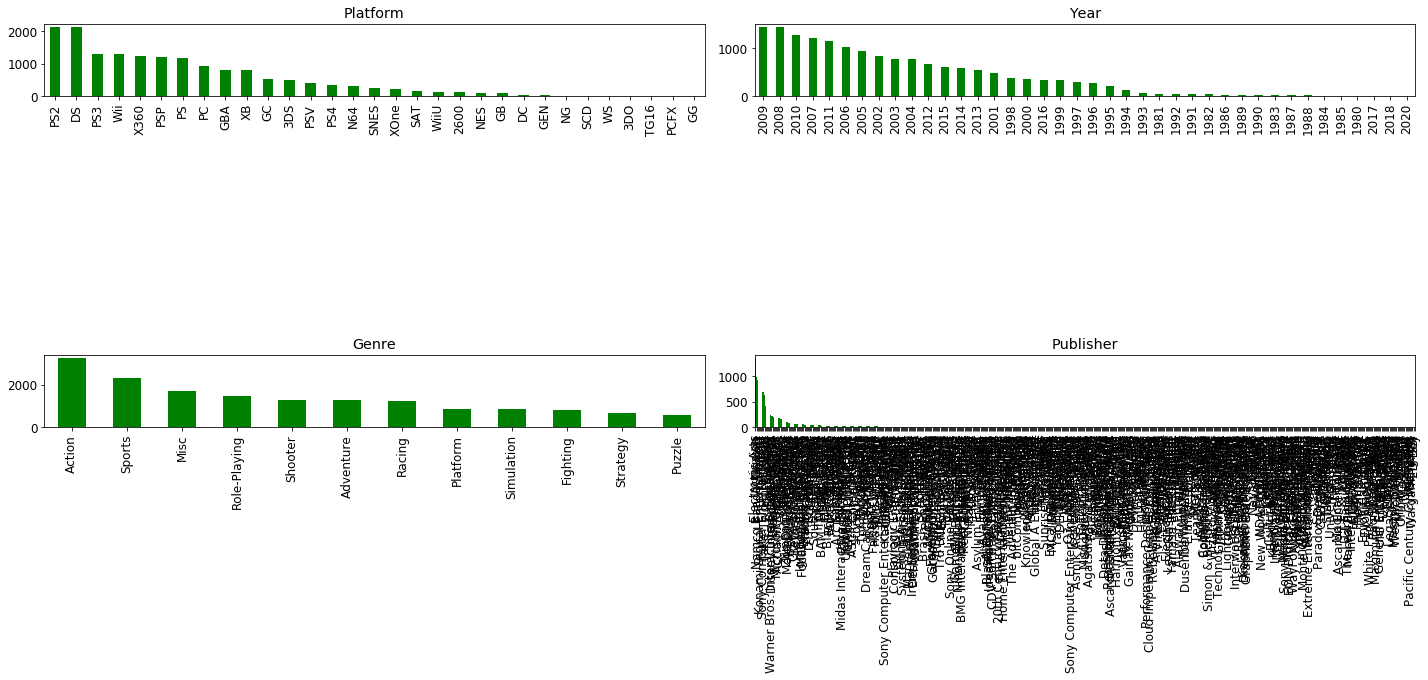

In [17]:
#plot a bar chart for each of our categorical attributes

plt.rcParams.update({'font.size': 12,'figure.figsize':(20,20)}) # set plot parameters
#use an index to identify the spot of the subplot
j=1

for k in col_cat :   #for each categorical column 
    plt.subplot(5,2,j) 
    games_final[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

We see from the above that PS2 and DS are two of the highest grossing platforms, and that Action and sports are the two highest grossing genres.

We also see no clear trend in terms of year of release, with the most recent years not necessarily being the highest grossing.

Furthermore, we see that there are far too many publishers in this data set for this to be a useful predictor as there are too many sparse classes.

Now I will check for any collinear variables.

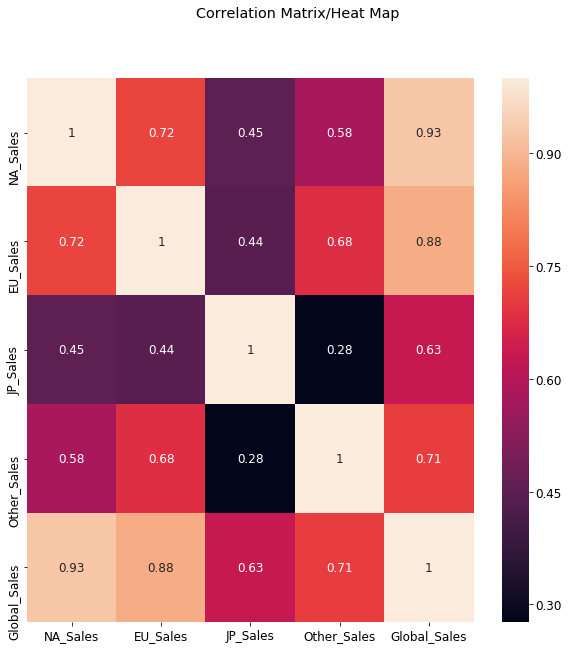

In [18]:
#graph heat map for correlation
corr_num=games_final[col_num].corr()
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz taken from link above
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

From the above correlation heat matrix, it appears that global sales is collinear with North American sales and also with EU sales. This indicates it would may not be appropriate to use Global sales in our models.

Next I will create dummy variables for the Genre categorical variable. The other variables have too many options to be included. 

In [19]:
#create data frame of just Genre column
categorical = games_final['Genre']

#get dummies
categorical_dummy=pd.get_dummies(categorical,drop_first=True)

#check results
categorical_dummy.head()

,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


### Dimensionality Reduction & Feature Selection

Next I will combine the lists of features, split the target from the other variables, and split the data into test and training sets.

In [20]:
#define target variable
target = pd.DataFrame(games_final['NA_Sales'])

#break out the numerical explanatory variables
explanatory_list = ['EU_Sales', 'JP_Sales', 'Other_Sales']
explanatory_numerical = games_final[explanatory_list]

In [21]:
#Standardize data frames
from sklearn.preprocessing import StandardScaler
explanatory_std = pd.DataFrame(StandardScaler().fit_transform(explanatory_numerical)).reset_index(drop=True)
target_std = pd.DataFrame(StandardScaler().fit_transform(target)).reset_index(drop=True)

#creating a dataframe with all numeric variables and the dummy categorical variables
explanatory=pd.concat([explanatory_std,categorical_dummy],axis=1)
explanatory = explanatory.rename(columns={0: "EU_Sales", 1: "JP_Sales", 2:"Other_Sales"})

#Import the module of the package sklearn.model_selection to split the dataframe into training and test
from sklearn.model_selection import train_test_split

#create the train and test datasets for the target and expanatory variables. Test size 0.3
x1_train, x1_test, y1_train, y1_test = train_test_split(explanatory, target_std, test_size=0.3, random_state=12)

In [22]:
#transform the target variable into a Data Frame
y1_train=pd.DataFrame(y1_train).reset_index(drop=True)
y1_test=pd.DataFrame(y1_test).reset_index(drop=True)

Now I will use bi-directional selection to select the best features for my model. Code based on an article from [Towards Data Science](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b).

In [23]:
#import modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

#define a function to perform bidirectional selection based on the code from Towards Data Science
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    '''This function takes a dataset of explanatory variables and a target variable and performs bidirectional
    selection to return the best features for a model.'''
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [24]:
#apply the function above to our dataset to get the variables we should use.
y1_train = y1_train.values.reshape(-1,1)
biselect_variables=stepwise_selection(x1_train, y1_train)
#print the variables selected by bidirectional selection
biselect_variables

['JP_Sales',
 'Other_Sales',
 'EU_Sales',
 'Platform',
 'Shooter',
 'Role-Playing',
 'Adventure',
 'Strategy',
 'Simulation']

### Part A: Linear Regression

I will now perform linear regression using the variables selected above and use RMSE, MAE, and R2 to evaluate the model.

In [25]:
# create a model with the variables chosen
explanatory_vars=x1_train[biselect_variables]
explanatory_vars=sm.add_constant(explanatory_vars)
est = sm.OLS(y1_train, explanatory_vars)
est_fit = est.fit()

#print the results
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:42:42   Log-Likelihood:                -10820.
No. Observations:               11468   AIC:                         2.166e+04
Df Residuals:                   11458   BIC:                         2.173e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          6.19e-06      0.007      0.001   

I can see that all the EU_Sales, JP_Sales, and Other_sales coefficients have the expected sign compared to the correlation with the North American Sales variable.

Next, I will cross-validate this model using k-fold cross validation with 5 folds. Since I have a large enough data set this will be appropriate. Since I want to compare models of different types, I will cross-validate the RMSE, MAE, and R2 values for each model.

In [26]:
#define a function to print the scores derived from cross-validation later on
#reference: Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow

#assign the linear regression model to a variable
model = LinearRegression()

#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cross_val_results_lin_reg_rmse = np.mean(np.sqrt(-cross_val_score(model, explanatory_vars, y1_train, scoring = "neg_mean_squared_error", cv=5)))
cross_val_results_lin_reg_mae = np.mean(np.sqrt(-cross_val_score(model, explanatory_vars, y1_train, scoring = "neg_mean_absolute_error", cv=5)))
cross_val_results_lin_reg_r2 = np.mean(cross_val_score(model, explanatory_vars, y1_train, cv=5,scoring='r2'))

#print results
print("Cross validated metrics for the Linear Regression")
print("The average RMSE for the 5 folds was: ", round(cross_val_results_lin_reg_rmse,4))
print("The average MAE score for the 5 folds was: ", round(cross_val_results_lin_reg_mae,4))
print("The average R2 score for the 5 folds was: ", round(cross_val_results_lin_reg_r2,4))

Cross validated metrics for the Linear Regression
The average RMSE for the 5 folds was:  0.6029
The average MAE score for the 5 folds was:  0.4841
The average R2 score for the 5 folds was:  0.6118


## XG Boost Model

Now that I have constructed the linear regression model, I will construct a model using XG Boost.

In [27]:
#import XGBClassifier
import xgboost 
from xgboost import XGBClassifier

xgb_model = XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=5, num_parallel_tree=1,
              objective='multi:softprob', random_state=0,
              reg_alpha=0.00999999978, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#fit the model using the result
xgb_model.fit(explanatory_vars, y1_train)

XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=5, num_parallel_tree=1,
              objective='multi:softprob', random_state=0,
              reg_alpha=0.00999999978, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [28]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cross_val_results_xg_rmse = np.mean(np.sqrt(-cross_val_score(xgb_model, explanatory_vars, y1_train, scoring = "neg_mean_squared_error", cv=5)))
cross_val_results_xg_mae = np.mean(np.sqrt(-cross_val_score(xgb_model, explanatory_vars, y1_train, scoring = "neg_mean_absolute_error", cv=5)))
cross_val_results_xg_r2 = np.mean(cross_val_score(xgb_model, explanatory_vars, y1_train, cv=5,scoring='r2'))

#print results
print("The average RMSE for the 5 folds was: ", round(cross_val_results_xg_rmse,4))
print("The average MAE score for the 5 folds was: ", round(cross_val_results_xg_mae,4))
print("The average R2 score for the 5 folds was: ", round(cross_val_results_xg_r2,4))

The average RMSE for the 5 folds was:  0.7925
The average MAE score for the 5 folds was:  0.4622
The average R2 score for the 5 folds was:  0.338


### Decision Tree Model - Random Forest

Now that I've constructed a linear regression model and an XG Boost model, I will construct a Random Forest model. Because I am using a continous target, I will use a Random Forest Regressor.

In [29]:
#import RandomForest
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(explanatory_vars, y1_train);

In [30]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cross_val_results_rf_rmse = np.mean(np.sqrt(-cross_val_score(rf, explanatory_vars, y1_train, scoring = "neg_mean_squared_error", cv=5)))
cross_val_results_rf_mae = np.mean(np.sqrt(-cross_val_score(rf, explanatory_vars, y1_train, scoring = "neg_mean_absolute_error", cv=5)))
cross_val_results_rf_r2 = np.mean(cross_val_score(rf, explanatory_vars, y1_train, cv=5,scoring='r2'))

#print results
print("The average RMSE for the 5 folds was: ", round(cross_val_results_rf_rmse,4))
print("The average MAE score for the 5 folds was: ", round(cross_val_results_rf_mae,4))
print("The average R2 score for the 5 folds was: ", round(cross_val_results_rf_r2,4))

The average RMSE for the 5 folds was:  0.5974
The average MAE score for the 5 folds was:  0.4278
The average R2 score for the 5 folds was:  0.6185


### SVM

Now that I have built decision tree, XG Boost, and linear regression models, I will construct an SVM model.

In [31]:
#Import the packages needed
from sklearn.svm import SVR

#save and fit the first model
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(explanatory_vars, y1_train)

SVR(C=100, gamma='auto', kernel='linear')

In [32]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cross_val_results_svm_rmse = np.mean(np.sqrt(-cross_val_score(svr_lin, explanatory_vars, y1_train, scoring = "neg_mean_squared_error", cv=5)))
cross_val_results_svm_mae = np.mean(np.sqrt(-cross_val_score(svr_lin, explanatory_vars, y1_train, scoring = "neg_mean_absolute_error", cv=5)))
cross_val_results_svm_r2 = np.mean(cross_val_score(svr_lin, explanatory_vars, y1_train, cv=5,scoring='r2'))

#print results
print("The average RMSE for the 5 folds was: ", round(cross_val_results_svm_rmse,4))
print("The average MAE score for the 5 folds was: ", round(cross_val_results_svm_mae,4))
print("The average R2 score for the 5 folds was: ", round(cross_val_results_svm_r2,4))

The average RMSE for the 5 folds was:  0.6116
The average MAE score for the 5 folds was:  0.4704
The average R2 score for the 5 folds was:  0.6026


### Part A - Results Comparison & Application of Model to Test Data

Now that I have created all of my models, I will create a dataframe to compare the results of each of the four models, choose the best one based on its performance on the various metrics, and apply the model to the testing data.

In [33]:
#summary of comparison between models
summary_df = pd.DataFrame(np.array([[round(cross_val_results_lin_reg_rmse,4),
                                     round(cross_val_results_lin_reg_mae,4),
                                     round(cross_val_results_lin_reg_r2,4)],
                                    [round(cross_val_results_xg_rmse,4),
                                     round(cross_val_results_xg_mae,4),
                                     round(cross_val_results_xg_r2,4)],
                                    [round(cross_val_results_rf_rmse,4),
                                     round(cross_val_results_rf_mae,4),
                                     round(cross_val_results_rf_r2,4)],
                                     [round(cross_val_results_svm_rmse,4),
                                     round(cross_val_results_svm_mae,4),
                                     round(cross_val_results_svm_r2,4)]]),
                   columns=['RMSE','MAE','R2'],index=['Linear','XG_Boost', 'Decision_Tree', 'SVM'])

#print results
summary_df

,RMSE,MAE,R2
Linear,0.6029,0.4841,0.6118
XG_Boost,0.7925,0.4622,0.3380
Decision_Tree,0.5974,0.4278,0.6185
SVM,0.6116,0.4704,0.6026


Based on the above data frame comparing the results of each of the models, I would choose the linear regression model since the results are very similar (if not slightly higher) across metrics to the SVM model, and linear regression is far less computationally expensive. Although the XG Boost had the highest RMSE score, it had the poorest score for R2. I therefore chose the linear regression because it is the best balance between performance and computational expense.

In [34]:
#use only columns included in training set
x_test = x1_test[biselect_variables]

#fit model
model.fit(x_test,y1_test)

#use our model to predict values from the test set
predictions2 = model.predict(x_test)

#check results
predictions2

array([[-0.46533162],
       [-0.24658812],
       [-0.46625854],
       ...,
       [-0.37902813],
       [-0.17538629],
       [-0.19510832]])

In [35]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cross_val_results_test_rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y1_test, scoring = "neg_mean_squared_error", cv=5)))
cross_val_results_test_mae = np.mean(np.sqrt(-cross_val_score(model, x_test, y1_test, scoring = "neg_mean_absolute_error", cv=5)))
cross_val_results_test_r2 = np.mean(cross_val_score(model, x_test, y1_test, cv=5,scoring='r2'))

#print results
print("Cross validated metrics for the Linear Regression")
print("The average RMSE for the 5 folds was: ", round(cross_val_results_test_rmse,4))
print("The average MAE score for the 5 folds was: ", round(cross_val_results_test_mae,4))
print("The average R2 score for the 5 folds was: ", round(cross_val_results_test_r2,4))

Cross validated metrics for the Linear Regression
The average RMSE for the 5 folds was:  0.7382
The average MAE score for the 5 folds was:  0.5145
The average R2 score for the 5 folds was:  0.4098


In [36]:
#summary of comparison between models and test
summary_df2 = pd.DataFrame(np.array([[round(cross_val_results_lin_reg_rmse,4),
                                     round(cross_val_results_lin_reg_mae,4),
                                     round(cross_val_results_lin_reg_r2,4)],
                                    [round(cross_val_results_xg_rmse,4),
                                     round(cross_val_results_xg_mae,4),
                                     round(cross_val_results_xg_r2,4)],
                                    [round(cross_val_results_rf_rmse,4),
                                     round(cross_val_results_rf_mae,4),
                                     round(cross_val_results_rf_r2,4)],
                                     [round(cross_val_results_svm_rmse,4),
                                     round(cross_val_results_svm_mae,4),
                                     round(cross_val_results_svm_r2,4)],
                                   [round(cross_val_results_test_rmse,4),
                                     round(cross_val_results_test_mae,4),
                                     round(cross_val_results_test_r2,4)]]),
                   columns=['RMSE','MAE','R2'],index=['Linear','XG_Boost', 'Decision_Tree', 'SVM', 'Test'])

#print results
summary_df2

,RMSE,MAE,R2
Linear,0.6029,0.4841,0.6118
XG_Boost,0.7925,0.4622,0.3380
Decision_Tree,0.5974,0.4278,0.6185
SVM,0.6116,0.4704,0.6026
Test,0.7382,0.5145,0.4098


From the above comparison data frame, I see that the linear regression model actually performed slightly better on the test data, and had a higher RMSE score. However, the R2 value is lower than it was on the training data. This suggests that perhaps I do not have the best model, or that perhaps if I had included different variables in my models I would have gotten better results.

## Part B: Yes/No Models

Now I will clean and prepare another dataset that is appropriate for making yes/no predictions. This dataset is on Pokemon and comes from [Kaggle](https://www.kaggle.com/abcsds/pokemon). With this dataset I will try to predict whether or not a Pokemon is considered "legendary."

### Data Dictionary

The dataset consists of the following columns:
- **Pokedex Number** - the number assigned to the Pokemon in the Pokedex which is an encyclopedia-like entity for tracking information on Pokemon.
- **Name of the Pokemon** - as suggested by the title of the column, this contains the name of the Pokemon
- **Type of Pokemon** - this refers to the type of Pokemon (grass, water, etc.) and largely refers to their habitat and attacks
- **Other Type of Pokemon** - this is for Pokemon who have two different types of attacks/defense, and can be blank if not applicable
- **Total** - sum of all stats that come after this, a general guide to how strong a pokemon is
- **HP** - hit points, or health, defines how much damage a pokemon can withstand before fainting
- **Attack** - the base modifier for normal attacks (eg. Scratch, Punch)
- **Defense** - the base damage resistance against normal attacks
- **SP Atk** - special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- **SP Def** - the base damage resistance against special attacks
- **Speed** - determines which pokemon attacks first each round
- **Generation** - indicates the generation of Pokemon
- **Legendary** - indicates whether or not the Pokemon is considered legendary

### Exploratory Data Analysis & Data Preparation

I will now begin my exploratory data analysis by reading in the file and performing exploratory data analysis.

In [37]:
#import data
pokemon = pd.read_csv('https://raw.githubusercontent.com/rachelward617/AIM-5010/master/Pokemon.csv')

#check results
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [38]:
#check for missing values and data types
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


I see from above that Type 2 has many null values. This is as expected since not all Pokemon have a second type of attack or defense. I will therefore change those to "none." Beyond this issue, the data types are as expected. I will also need to change the Legendary column to 1s and 0s to represent True and False so that it can be used in the models.

In [39]:
#fill null Type 2 values with none
pokemon['Type 2'] = pokemon['Type 2'].fillna("none")

#check number of nulls
pokemon.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [40]:
#check for duplicates
pokemon[pokemon.duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [41]:
#change bool true/false to 1s and 0s
pokemon['Legendary'] = pokemon['Legendary'].astype(int)

#check results
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,0


In [42]:
#get summary statistics for each numeric variable, including mean, standard deviation, median, quartiles, and range
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


There are no immediate data integrity issues that appear when looking at this, the ranges of the data seem valid. So, I will proceed to look at visualizations of my data.

In [43]:
#create lists of numerical and categorical attributes
#will ignore name and number attributes as they will not be useful in my models
#generation and legendary are categorical despite being integers
col_cat2=['Type 1', 'Type 2', 'Generation', 'Legendary']

col_num2=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

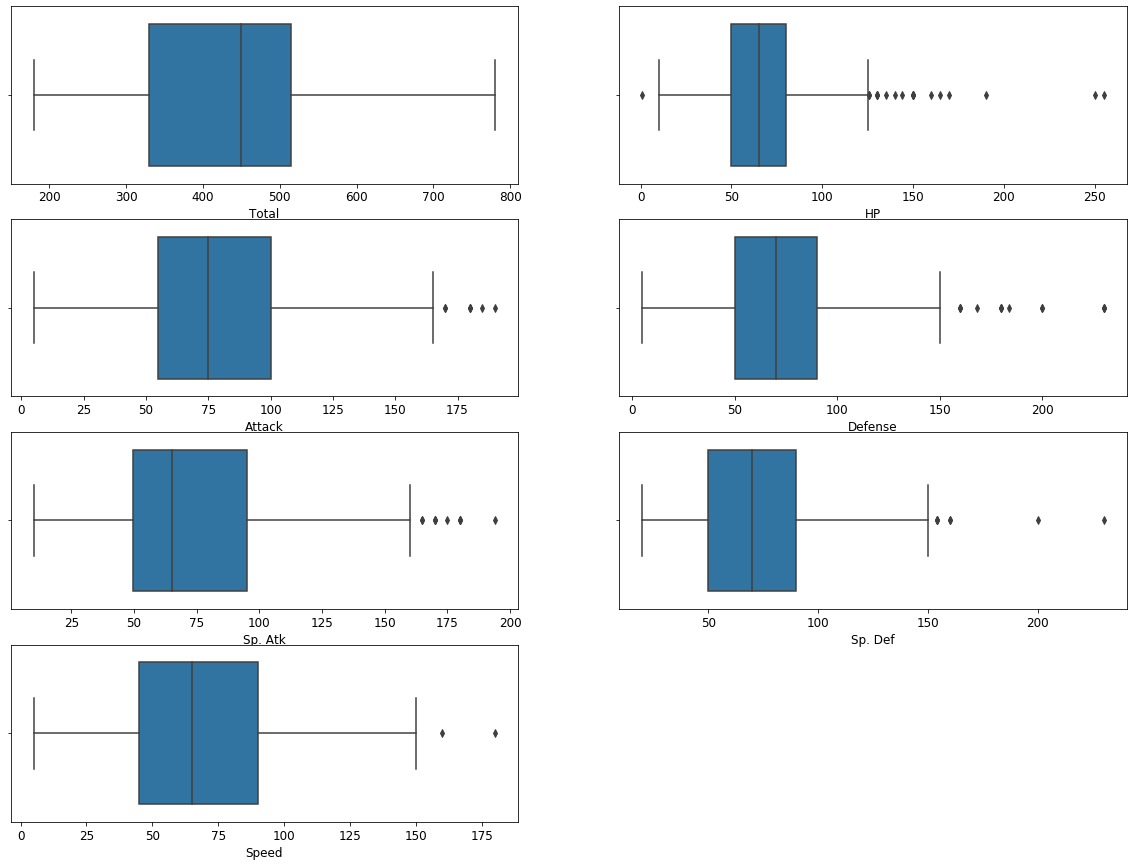

In [44]:
#define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,15))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1

for k in col_num2 :   #for each numeric variable graph a boxplot 
    plt.subplot(4,2,j) 
    sns.boxplot(x=k, data=pokemon);
    j=j+1

#show results    
plt.show()

Although there appear to be outleirs, there do not appear to be that many outliers where it would substantially impact my results so I will leave them as is. 

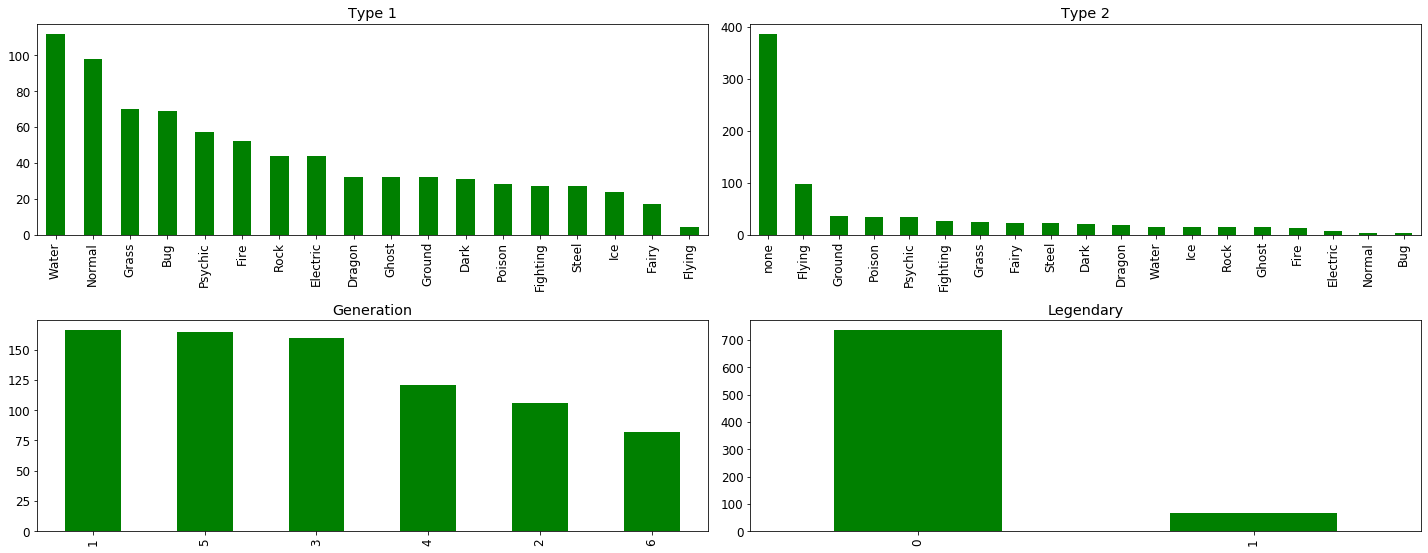

In [45]:
#plot a bar chart for each of our categorical attributes

plt.rcParams.update({'font.size': 12,'figure.figsize':(20,20)}) # set plot parameters
#use an index to identify the spot of the subplot
j=1

for k in col_cat2 :   #for each categorical column 
    plt.subplot(5,2,j) 
    pokemon[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the above I note that the classes of my target variable are imbalanced. I will therefore expect low performance scores.

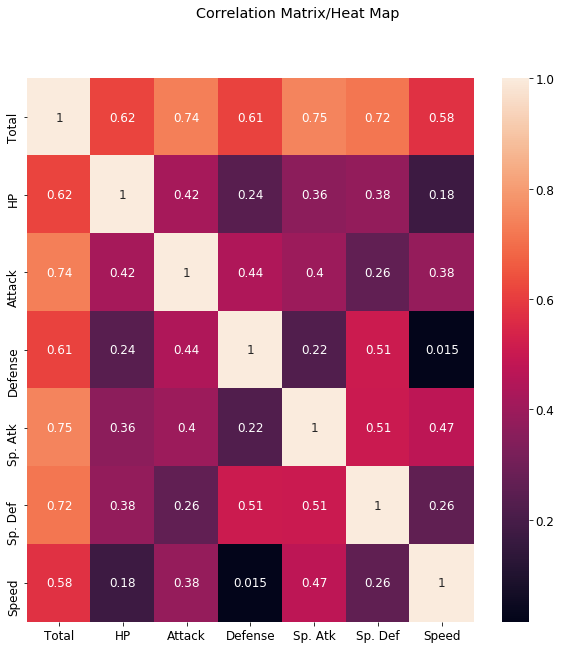

In [46]:
#graph heat map for correlation
corr_num2=pokemon[col_num2].corr()
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_num2, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz taken from link above
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

Although there are a few variables which are highly correlated, none are so highly correlated that would indicate collinearity. I will therefore proceed to the next phase.

### Dimensionality Reduction & Feature Selection

I will now use bidirectional selection to choose which columns to include in my models. Since my data is all relatively on the same scale, I do not need to standardize it.

In [47]:
#define target variable
target2 = pd.DataFrame(pokemon['Legendary'])

col_cat3=['Type 1', 'Type 2', 'Generation']

categorical2 = pd.DataFrame(pokemon[col_cat3])

#get dummies
categorical_dummy2=pd.get_dummies(categorical2,drop_first=True)

#check results
categorical_dummy2.head()

,Generation,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Type 2_none
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
#dataframe of numerical explanatory
col_num3 = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
explanatory_num2 = pd.DataFrame(pokemon[col_num3])

#creating a dataframe with all numeric variables and the dummy categorical variables
explanatory2=pd.concat([explanatory_num2,categorical_dummy2],axis=1)

#check results
explanatory2.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Type 2_none
0,45,49,49,65,65,45,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,60,62,63,80,80,60,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,80,82,83,100,100,80,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,80,100,123,122,120,80,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,39,52,43,60,50,65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
#create the train and test datasets for the target and expanatory variables. Test size 0.3
x2_train, x2_test, y2_train, y2_test = train_test_split(explanatory2, target2, test_size=0.3, random_state=12)

In [50]:
#apply the function above to our dataset to get the variables we should use.
y2_train = y2_train.values.reshape(-1,1)
biselect_variables2=stepwise_selection(x2_train, y2_train)

#print the variables selected by bidirectional selection
biselect_variables2

['Sp. Atk',
 'Sp. Def',
 'Attack',
 'Type 1_Psychic',
 'Type 1_Dragon',
 'Speed',
 'Type 1_Ground',
 'Type 1_Rock']

In [51]:
#calculate proportion of legendary pokemon in target
y2_train.sum() / y2_train.shape[0]

0.08928571428571429

### Part B: Binary Logistic Regression Model

Now that the data is fully prepared, I will create a binary logistic regression model. I will also calculate performance metrics such as accuracy, roc_auc, and recall.

In [54]:
#define model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

x2 = x2_train[biselect_variables2]

#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
logreg1_auc = np.mean(cross_val_score(model1, x2, y2_train, scoring = "roc_auc", cv=5))
logreg1_acc = np.mean(cross_val_score(model1, x2, y2_train, cv=5,scoring='accuracy'))
logreg1_rec = np.mean(cross_val_score(model1, x2, y2_train, cv=5,scoring='recall'))

#print results
print("The average AUC_ROC score for the 5 folds was: ", round(logreg1_auc,4))
print("The average Accuracy score for the 5 folds was: ", round(logreg1_acc,4))
print("The average Recall score for the 5 folds was: ", round(logreg1_rec,4))

The average AUC_ROC score for the 5 folds was:  0.9657
The average Accuracy score for the 5 folds was:  0.9411
The average Recall score for the 5 folds was:  0.56


### Part B: Multinomial Logistic Regression

I will now create a multinomial logistic regression.

In [55]:
#create second model with multinomial designation
model2 = LogisticRegression(multi_class = 'multinomial')

#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
logreg2_auc = np.mean(cross_val_score(model2, x2, y2_train, scoring = "roc_auc", cv=5))
logreg2_acc = np.mean(cross_val_score(model2, x2, y2_train, cv=5,scoring='accuracy'))
logreg2_rec = np.mean(cross_val_score(model2, x2, y2_train, cv=5,scoring='recall'))

#print results
print("The average AUC_ROC score for the 5 folds was: ", round(logreg2_auc,4))
print("The average Accuracy score for the 5 folds was: ", round(logreg2_acc,4))
print("The average Recall score for the 5 folds was: ", round(logreg2_rec,4))

The average AUC_ROC score for the 5 folds was:  0.9647
The average Accuracy score for the 5 folds was:  0.9411
The average Recall score for the 5 folds was:  0.56


### Part B: Ordinal Logistic Regression

I will now create an ordinal logistic regression model.

In [56]:
from mord import LogisticAT
classifier3 = LogisticAT(alpha=0)
classifier3.fit(x2, y2_train)

LogisticAT(alpha=0)

In [58]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
logreg_3auc = np.mean(cross_val_score(classifier3, x2, y2_train, scoring = "roc_auc", cv=5))
logreg3_acc = np.mean(cross_val_score(classifier3, x2, y2_train, cv=5,scoring='accuracy'))
logreg3_rec = np.mean(cross_val_score(classifier3, x2, y2_train, cv=5,scoring='recall'))

#print results
print("The average AUC_ROC score for the 5 folds was: ", round(logreg_3auc,4))
print("The average Accuracy score for the 5 folds was: ", round(logreg3_acc,4))
print("The average Recall score for the 5 folds was: ", round(logreg3_rec,4))

The average AUC_ROC score for the 5 folds was:  0.968
The average Accuracy score for the 5 folds was:  0.9446
The average Recall score for the 5 folds was:  0.5494


### Model Selection and Application to Test Data

I will now compare the three models and select my preferred model based on the best performance and computational expense. I will then apply my preferred model to my test data.

In [59]:
#summary of comparison between models and test
summary_df_log = pd.DataFrame(np.array([[round(logreg1_auc,4),
                                     round(logreg1_acc,4),
                                     round(logreg1_rec,4)],
                                    [round(logreg2_auc,4),
                                     round(logreg2_acc,4),
                                     round(logreg2_rec,4)],
                                    [round(logreg_3auc,4),
                                     round(logreg3_acc,4),
                                     round(logreg3_rec,4)]]),
                   columns=['ROC_AUC','Accuracy','Recall'],index=['Binary','Multinomial', 'Ordinal'])

#print results
summary_df_log

,ROC_AUC,Accuracy,Recall
Binary,0.9657,0.9411,0.5600
Multinomial,0.9647,0.9411,0.5600
Ordinal,0.9680,0.9446,0.5494


From the above I can see that the binary and multinomial models have nearly identical performance. The ordinal has a slightly higher roc_auc score but has a lower recall. Given the additional computational expense of an ordinal model, and since we are just looking at a binary solution here, I will choose the binary logistic model. 

In [60]:
#use only columns included in training set
x_test2 = x2_test[biselect_variables2]

#fit model
model1.fit(x_test2,y2_test)

LogisticRegression()

In [61]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
logregtest_auc = np.mean(cross_val_score(model1, x_test2, y2_test, scoring = "roc_auc", cv=5))
logregtest_acc = np.mean(cross_val_score(model1, x_test2, y2_test, cv=5,scoring='accuracy'))
logregtest_rec = np.mean(cross_val_score(model1, x_test2, y2_test, cv=5,scoring='recall'))

#print results
print("The average AUC_ROC score for the 5 folds was: ", round(logregtest_auc,4))
print("The average Accuracy score for the 5 folds was: ", round(logregtest_acc,4))
print("The average Recall score for the 5 folds was: ", round(logregtest_rec,4))

The average AUC_ROC score for the 5 folds was:  0.9393
The average Accuracy score for the 5 folds was:  0.9417
The average Recall score for the 5 folds was:  0.3333


In [62]:
#summary of comparison between models and test
summary_df_log2 = pd.DataFrame(np.array([[round(logreg1_auc,4),
                                     round(logreg1_acc,4),
                                     round(logreg1_rec,4)],
                                    [round(logreg2_auc,4),
                                     round(logreg2_acc,4),
                                     round(logreg2_rec,4)],
                                    [round(logreg_3auc,4),
                                     round(logreg3_acc,4),
                                     round(logreg3_rec,4)],
                                    [round(logregtest_auc,4),
                                     round(logregtest_acc,4),
                                     round(logregtest_rec,4)]   ]),
                   columns=['ROC_AUC','Accuracy','Recall'],index=['Binary','Multinomial', 'Ordinal','Test'])

#print results
summary_df_log2

,ROC_AUC,Accuracy,Recall
Binary,0.9657,0.9411,0.5600
Multinomial,0.9647,0.9411,0.5600
Ordinal,0.9680,0.9446,0.5494
Test,0.9393,0.9417,0.3333


Based on the above I see that my model performed slightly worse with roc_auc, but slightly better on accuracy. The recall was much lower when applied to the test data.

## Part C

Next I will create a cluster model using the Pokemon data from part B and see what information can be derived from the clusters. I will use K-means clustering from sklearn with K=2.

In [63]:
#import module
from sklearn.cluster import KMeans

#create a copy of our dataframe 
sessions_km2 = x2.copy()

#use Kmeans with K=2
km = KMeans(n_clusters=2)
km.fit(sessions_km2)
#save predictions to be added to our dataframe
labels = km.predict(sessions_km2)

#label our predictions as "Revenue" in a dedicated column
sessions_km2['Predictions'] = labels

In [64]:
#check how many observations are in each cluster
sessions_km2.Predictions.value_counts()

0    284
1    276
Name: Predictions, dtype: int64

The clusters separated the data into two fairly even clusters. However, given the imbalanced class of the target variable, I know that the clusters cannot possibly be accurate. This would likely be a more meaningful exercise if applied to a larger dataset where you were not sure how many groups you had.